<a href="https://colab.research.google.com/github/sajalsaini/ML-Projects/blob/main/BearClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fastbook

     |████████████████████████████████| 720 kB 4.1 MB/s 
     |████████████████████████████████| 1.2 MB 37.6 MB/s 
     |████████████████████████████████| 189 kB 48.2 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 51 kB 312 kB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from fastbook import *

In [3]:
urls = search_images_ddg("grizzly bear", max_images = 100)

In [4]:
len(urls)

100

In [5]:
urls[0]

'https://media.salon.com/2014/03/Grizzly-Bear.jpg'

In [6]:
help(download_url)

Help on function download_url in module fastdownload.core:

download_url(url, dest=None, timeout=None, show_progress=True)
    Download `url` to `dest` and show progress



In [7]:
download_url(urls[0], "images/bear.jpg")
Im = Image.open("images/bear.jpg")

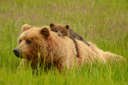

In [8]:
Im.to_thumb(128,128)

In [9]:
bear_types = "grizzly", "black", "teddy"
path = Path("bears")

In [10]:
path

Path('bears')

In [11]:
bear_types

('grizzly', 'black', 'teddy')

In [12]:
type(bear_types)

tuple

In [13]:
if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok = True)
    urls = search_images_ddg(f"{o} bear", max_images = 100)
    download_images(dest, urls=urls)

In [14]:
fns = get_image_files(path)
fns

(#288) [Path('bears/black/00000044.jpg'),Path('bears/black/00000080.jpg'),Path('bears/black/00000039.jpg'),Path('bears/black/00000036.jpg'),Path('bears/black/00000066.jpg'),Path('bears/black/00000030.jpg'),Path('bears/black/00000026.jpg'),Path('bears/black/00000067.jpeg'),Path('bears/black/00000051.jpg'),Path('bears/black/00000014.jpeg')...]

In [15]:
failed = verify_images(fns)
failed

(#0) []

In [16]:
failed.map(Path.unlink);

In [17]:
failed

(#0) []

In [18]:
fns

(#288) [Path('bears/black/00000044.jpg'),Path('bears/black/00000080.jpg'),Path('bears/black/00000039.jpg'),Path('bears/black/00000036.jpg'),Path('bears/black/00000066.jpg'),Path('bears/black/00000030.jpg'),Path('bears/black/00000026.jpg'),Path('bears/black/00000067.jpeg'),Path('bears/black/00000051.jpg'),Path('bears/black/00000014.jpeg')...]

In [19]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [20]:
dls = bears.dataloaders(path)

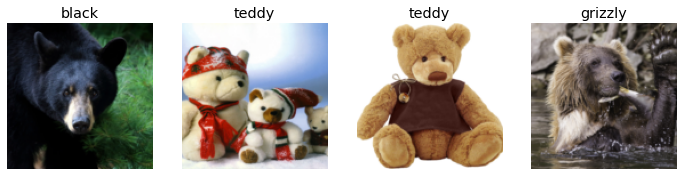

In [21]:
dls.valid.show_batch(max_n = 4, nrows = 1)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


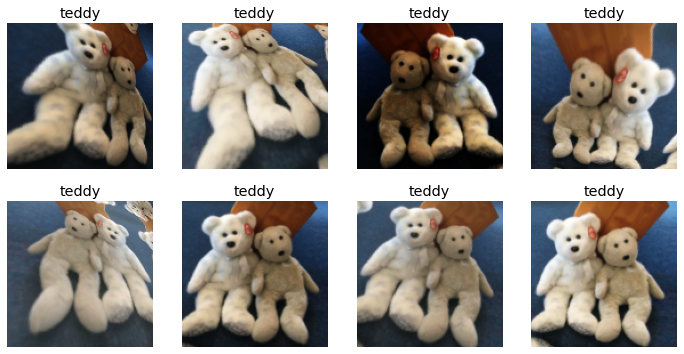

In [22]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [23]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [24]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.492683,0.872879,0.228070,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.263438,0.342951,0.122807,00:25
1,0.187237,0.307114,0.052632,00:25
2,0.155051,0.291246,0.035088,00:25
3,0.121769,0.257245,0.035088,00:25


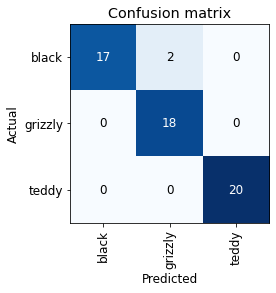

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

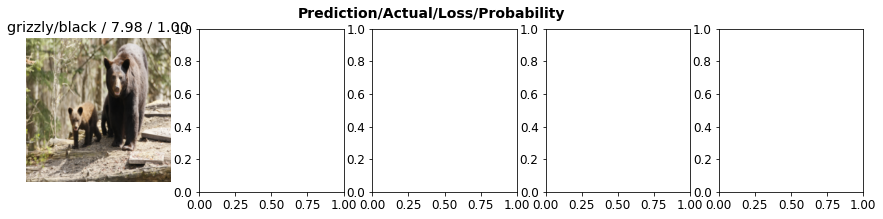

In [28]:
interp.plot_top_losses(5, nrows=1)

In [29]:
learn.export()

In [30]:
path = Path()
path.ls(file_exts = ".pkl")

(#1) [Path('export.pkl')]

In [31]:
learn_inf = load_learner(path/"export.pkl")

In [32]:
learn_inf

In [33]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

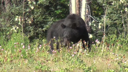

In [40]:
img = PILImage.create(uploader.data[0])
img.to_thumb(128,128)

In [52]:
btn_run = widgets.Button(description = "Classify")
btn_run

Button(description='Classify', style=ButtonStyle())

In [53]:
def on_click_classify(change):
    img = PILImage.create(uploader.data[0])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [54]:
widgets.VBox([widgets.Label('Select your bear!'), 
      uploader, btn_run, out_pl, lbl_pred])